[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ebgv/Planet--Understanding-the-Amazon-from-Space/blob/master/downloading_from_kaggle.ipynb)

# Loading the data from kaggle

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"danielwientjens","key":"57cf17d52f3b8964bfc1796533f16115"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!mkdir -p data

In [71]:
# train_v2.csv 

# downloading from kaggle 
% cd /content
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p data
# unzipping
% cd /content/data
!unzip train_v2.csv.zip -d /content/data

/content
train_v2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
/content/data
Archive:  train_v2.csv.zip
replace /content/data/train_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/train_v2.csv  
replace /content/data/__MACOSX/._train_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/__MACOSX/._train_v2.csv  


In [72]:
# train-jpg.tar.7z
# this should take a little time - loading all the images 

# downloading from kaggle 
% cd /content
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p data
# unzipping 
% cd /content/data
!7z x -so train-jpg.tar.7z | tar xf - -C /content/data

/content
train-jpg.tar.7z: Skipping, found more recently modified local copy (use --force to force download)
/content/data


# Saving to drive 

In [0]:
"""!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)"""

In [61]:
"""%cd /content/data
%ls"""

/content/data
labeled_images/  train-jpg/        train_v2.csv
__MACOSX/        train-jpg.tar.7z  train_v2.csv.zip


In [0]:
"""upload = drive.CreateFile({'title': 'train-jpg.tar.7z'})
upload.SetContentFile('train-jpg.tar.7z')
upload.Upload()"""

# Reading the data

In [0]:
import pandas as pd

In [89]:
train_label = pd.read_csv('/content/data/train_v2.csv')
train_label.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
weather_list = ['partly_cloudy', 'haze', 'cloudy', 'clear']

In [128]:
train_label = pd.read_csv('/content/data/train_v2.csv')
weather_list = ['partly_cloudy', 'haze', 'cloudy', 'clear']
weather_tag_list = [[element for element in tag.split() if element in weather_list] for tag in train_label['tags']]
train_label['weather_tags'] = [''.join(tag) for tag in weather_tag_list]
train_label.head()

,image_name,tags,weather_tags
0,train_0,haze primary,haze
1,train_1,agriculture clear primary water,clear
2,train_2,clear primary,clear
3,train_3,clear primary,clear
4,train_4,agriculture clear habitation primary road,clear


# Loading the images 

In [77]:
% cd /content/data/train-jpg

/content/data/train-jpg


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

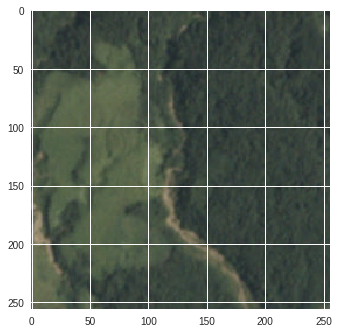

In [78]:
img = mpimg.imread('train_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [65]:
"""for i in range(5): 
  img = mpimg.imread('train_{}.jpg'.format(i))
  imgplot = plt.imshow(img)
  plt.show()"""

"for i in range(5): \n  img = mpimg.imread('train_{}.jpg'.format(i))\n  imgplot = plt.imshow(img)\n  plt.show()"

# Creating folders by class - work in progress

In [79]:
train_label.describe()

,image_name,tags
count,40479,40479
unique,40479,449
top,train_18375,clear primary
freq,1,13636


In [80]:
len(train_label['tags'].unique()) # number of categories 

449

In [81]:
train_label.shape # number of individuals 

(40479, 2)

In [85]:
train_label['image_name'][train_label['tags'] == 'haze primary'][:5]

0        train_0
7        train_7
60      train_60
104    train_104
132    train_132
Name: image_name, dtype: object

In [87]:
train_label.groupby(['tags']).count().sort_values(by = 'image_name', ascending = False).head(30)

,image_name
tags,
clear primary,13636
partly_cloudy primary,3630
cloudy,2089
clear primary water,1850
agriculture clear primary road,1680
agriculture clear primary,1626
haze primary,1471
agriculture clear cultivation primary,1170
agriculture clear habitation primary road,1125


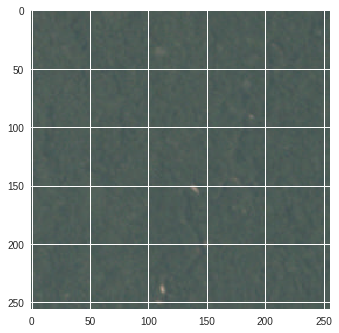

In [86]:
img = mpimg.imread('train_104.jpg')
imgplot = plt.imshow(img)
plt.show()

# Creating sub folders

In [0]:
import shutil

In [0]:
def copy_files_to_folder(list_files, new_folder): # list of files and new folder name as string 
    !mkdir $new_folder
    for file in list_files: 
        shutil.copy('/content/data/train-jpg/{}.jpg'.format(file), new_folder)

In [46]:
% cd /content/data
! mkdir labeled_images 
% cd labeled_images

/content/data
mkdir: cannot create directory ‘labeled_images’: File exists
/content/data/labeled_images


In [59]:
%cd /content/data/labeled_images

group_name = 'clear primary water'

image_names = train_label['image_name'][train_label['tags'] == group_name]
copy_files_to_folder(image_names, group_name)

/content/data/labeled_images
